# TASK 1: RETRIEVING AND PREPARING THE DATA

In [1]:
#THE LIBRARIES ARE IMPORTED WEHRE NECESSARY
#IMPORTING PANDAS
import pandas as pd


In [2]:
#READING DATA FROM THE GIVEN DATASETS

traindata = pd.read_csv(r"C:\Users\vivek\OneDrive\Desktop\trainingData_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.csv", sep=",")
testdata = pd.read_csv(r"C:\Users\vivek\OneDrive\Desktop\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.csv", sep=",")

#CHECKING SHAPE OF DATA
traindata.shape



(258, 9)

In [3]:
testdata.shape

(145, 9)

In [4]:
#MERGING THE GIVEN DATASETS INTO ONE DATAFRAME
dataset_df = pd.concat([traindata, testdata], axis=0, ignore_index=True)

#PRINTING THE NEW DATAFRAME 
print(dataset_df.head())

    STG   SCG   STR   LPR   PEG       UNS  Unnamed: 6  Unnamed: 7  \
0  0.00  0.00  0.00  0.00  0.00  very_low         NaN         NaN   
1  0.08  0.08  0.10  0.24  0.90      High         NaN         NaN   
2  0.06  0.06  0.05  0.25  0.33       Low         NaN         NaN   
3  0.10  0.10  0.15  0.65  0.30    Middle         NaN         NaN   
4  0.08  0.08  0.08  0.98  0.24       Low         NaN         NaN   

                              Attribute Information:  
0  STG (The degree of study time for goal object ...  
1  SCG (The degree of repetition number of user f...  
2  STR (The degree of study time of user for rela...  
3  LPR (The exam performance of user for related ...  
4  PEG (The exam performance of user for goal obj...  


In [5]:
#PRINTING SHAPE OF NEW DATAFRAME
dataset_df.shape

(403, 9)

In [6]:
#PRINTING COLOUMNS OF DATA
dataset_df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS', 'Unnamed: 6', 'Unnamed: 7',
       'Attribute Information:'],
      dtype='object')

In [7]:
#REMOVING THE WHITE SPACES FROM EACH COLOUMN

dataset_df['STG'] = dataset_df['STG'].astype(str).str.strip()
dataset_df['SCG'] = dataset_df['SCG'].astype(str).str.strip()
dataset_df['LPR'] = dataset_df['LPR'].astype(str).str.strip()
dataset_df['STR'] = dataset_df['STR'].astype(str).str.strip()
dataset_df['PEG'] = dataset_df['PEG'].astype(str).str.strip()
dataset_df['UNS'] = dataset_df[' UNS'].astype(str).str.strip()

In [8]:
#CHECKING FOR DATA TYPE OF EACH COLOUMN
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     403 non-null    object 
 1   SCG                     403 non-null    object 
 2   STR                     403 non-null    object 
 3   LPR                     403 non-null    object 
 4   PEG                     403 non-null    object 
 5    UNS                    403 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  12 non-null     object 
 9   UNS                     403 non-null    object 
dtypes: float64(2), object(8)
memory usage: 31.6+ KB


In [9]:
#CONVERTING ALL OBJECT DATA TYPE INTO FLOAT VALUES USING ASTYPE()
dataset_df['STG'] = dataset_df['STG'].astype(float)
dataset_df['SCG'] = dataset_df['SCG'].astype(float)
dataset_df['STR'] = dataset_df['STR'].astype(float)
dataset_df['LPR'] = dataset_df['LPR'].astype(float)
dataset_df['PEG'] = dataset_df['PEG'].astype(float)

In [10]:
#CHECKING CHANGED DATA TYPE
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     403 non-null    float64
 1   SCG                     403 non-null    float64
 2   STR                     403 non-null    float64
 3   LPR                     403 non-null    float64
 4   PEG                     403 non-null    float64
 5    UNS                    403 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  12 non-null     object 
 9   UNS                     403 non-null    object 
dtypes: float64(7), object(3)
memory usage: 31.6+ KB


In [11]:
#DROPPING THE COLUMNS BECAUSE WE DONT NEED THEM
dataset_df = dataset_df.drop('Attribute Information:',axis=1)
dataset_df = dataset_df.drop(columns=['Unnamed: 6','Unnamed: 7'])
dataset_df = dataset_df.drop(columns=[' UNS',])


In [12]:
#CHECKING WHETHER COLUMNS ARE ACTUALLY DELETED OR NOT
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [13]:
#CHECKING FOR UNIQUE VALLUES IN THE UNS COLUMN
print(dataset_df['UNS'].unique())


['very_low' 'High' 'Low' 'Middle' 'Very Low']


In [14]:
#REPLACING VERY_LOW WITH VERY LOW
dataset_df['UNS'] = dataset_df['UNS'].replace({'very_low': 'Very Low'})


In [15]:
#CHECKING FOR THE UNIQUE VALUES AGAIN
print(dataset_df['UNS'].unique())


['Very Low' 'High' 'Low' 'Middle']


In [16]:
#PRINTING HEAD TO CHECK WHETHER DATA IS CLEANER OR NOT
dataset_df.head(10)


,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low
5,0.09,0.15,0.40,0.10,0.66,Middle
6,0.10,0.10,0.43,0.29,0.56,Middle
7,0.15,0.02,0.34,0.40,0.01,Very Low
8,0.20,0.14,0.35,0.72,0.25,Low
9,0.00,0.00,0.50,0.20,0.85,High


In [17]:
#CHECKING FOR NULL VALUES USING ISNULL()

dataset_df.isnull().sum()

STG    0
SCG    0
STR    0
LPR    0
PEG    0
UNS    0
dtype: int64

In [18]:
#DESCRIBING DATA WITH DESCRIBE()
dataset_df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


# TASK 2: Data Exploration

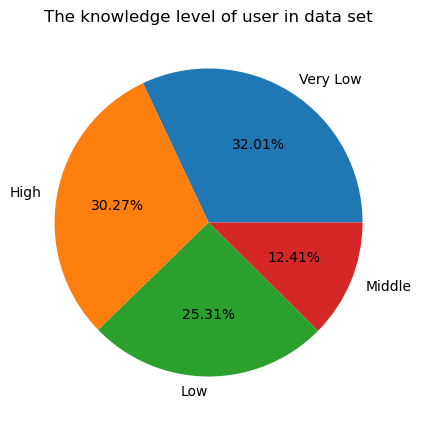

In [19]:
#IMPORTING MATPLOTLIB TO MAKE GRAPHS
import matplotlib.pyplot as plt

#MAKING A PIE CHART OF UNIQUE UNS VALUES
plt.figure(figsize=(10, 5))
plt.title('The knowledge level of user in data set')
plt.pie(dataset_df['UNS'].value_counts(), labels=dataset_df['UNS'].unique(), autopct='%2.2f%%')
plt.show()

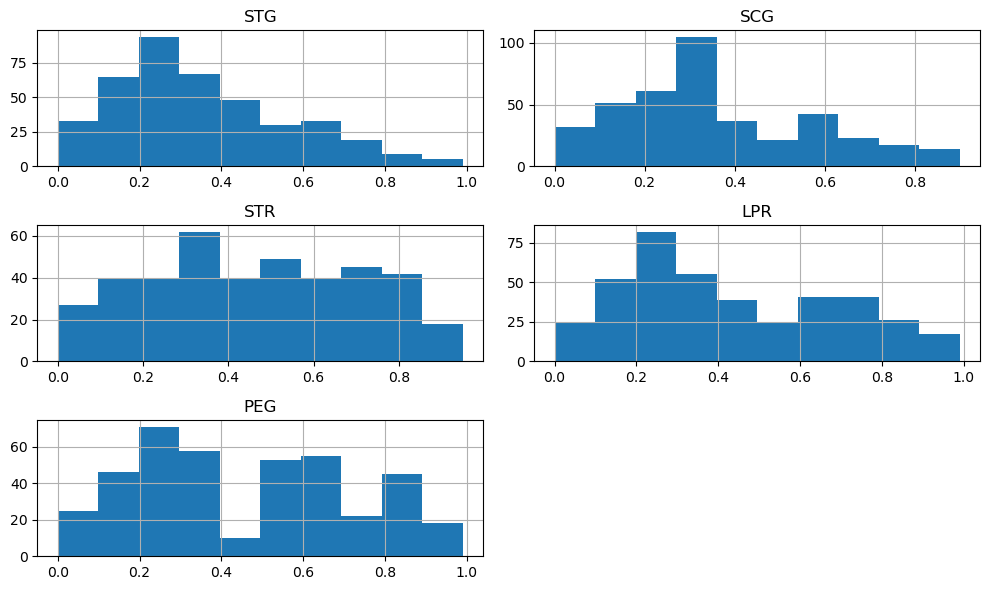

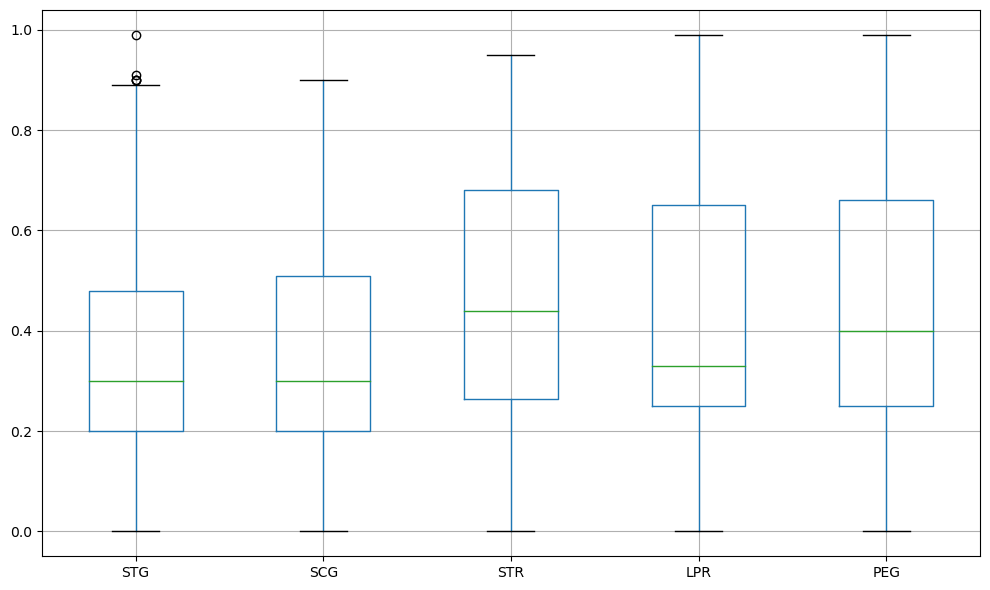

In [20]:
#IMPORTING SEABORN
import seaborn as sns


# SELECTING COLUMNS TO INCLUDE IN THE PLOT
columns_to_plot = dataset_df.columns[:-1]

#PLOTTING HISTOGRAMS
dataset_df[columns_to_plot].hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

#PLOTTING BOX PLOTS
dataset_df[columns_to_plot].boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()


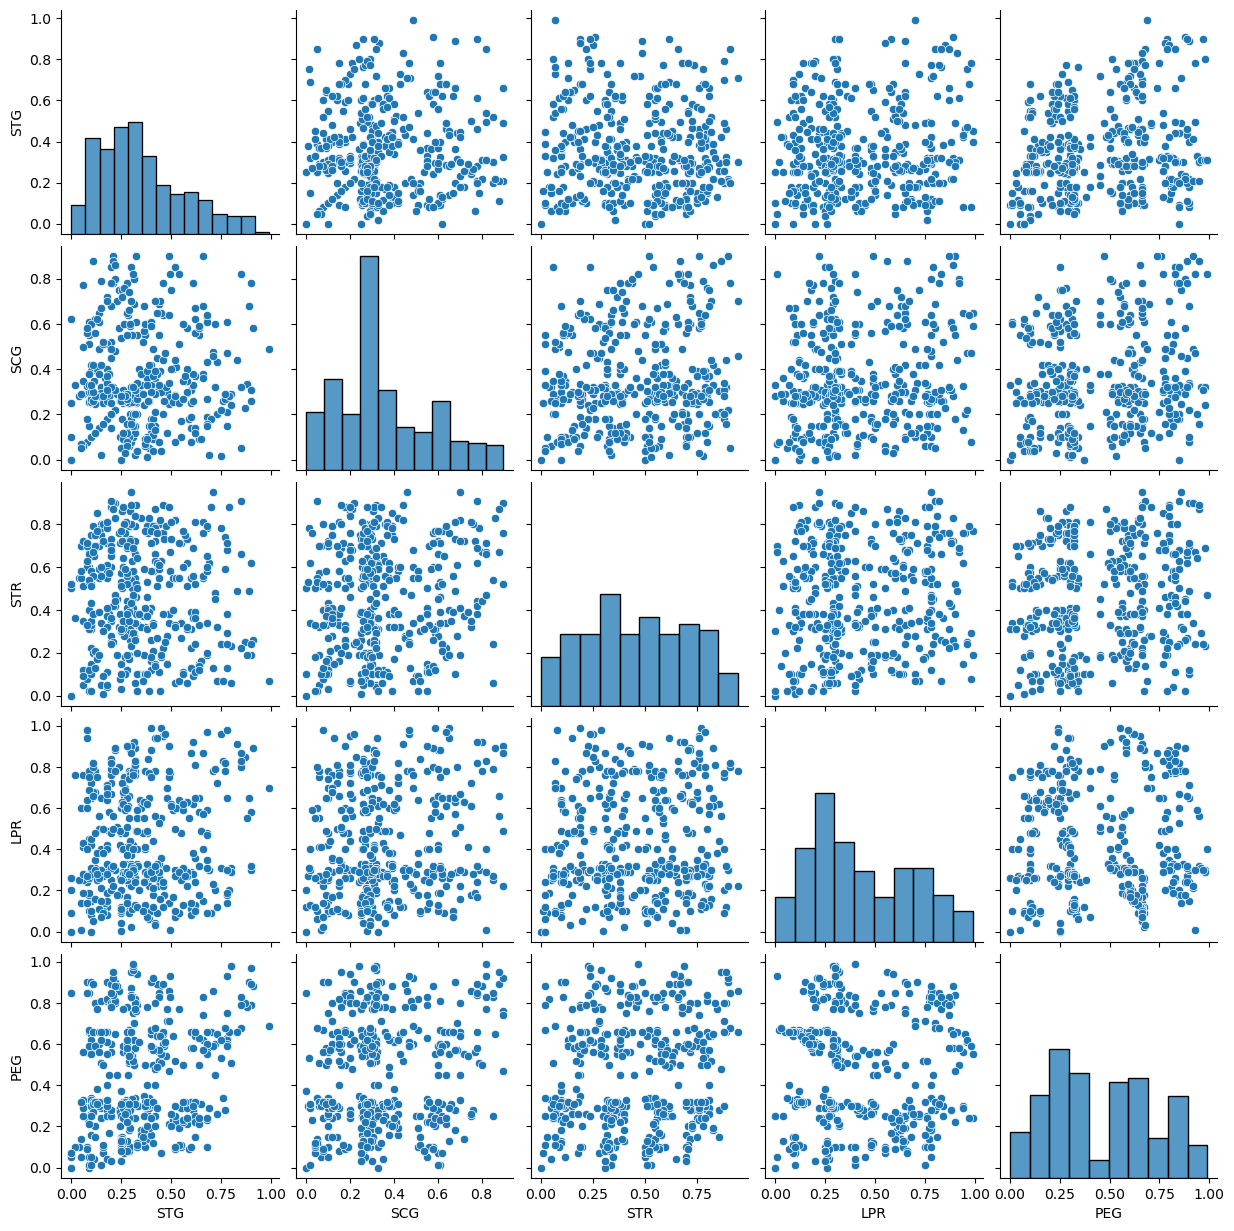

In [21]:
#PLOTTING PAIR PLOTS
sns.pairplot(data=dataset_df, vars=['STG', 'SCG', 'STR', 'LPR', 'PEG'], kind='scatter')
plt.show()

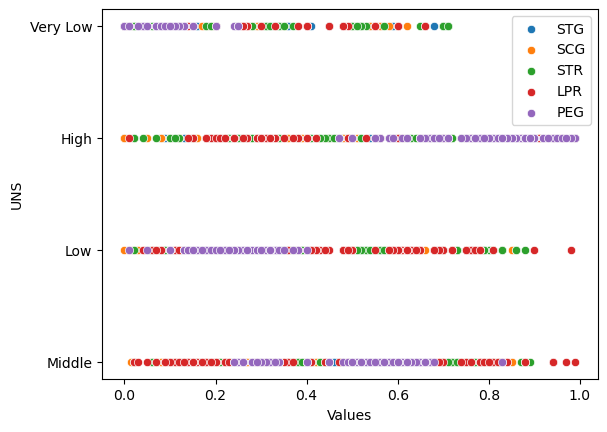

In [22]:
#IMPORTED NUMPY, SEABORN AND MATPLOTLIB ABOVE

#PLOTTING A SCATTER PLOT FOR EACH INDIVIDUAL COLUMN USING FOR LOOP, SAVES A LOT OF LINES OF CODE
for column in dataset_df.columns:
    if column != 'UNS':
        sns.scatterplot(x=column, y='UNS', data=dataset_df, label=column)

#SETTING LABEL FOR X-AXIS
plt.xlabel('Values')

#SETTING THE LABEL FOR Y-AXIS
plt.ylabel('UNS')

#CREATING LEGEND
plt.legend()

#DISPLAYING THE PLOT
plt.show()


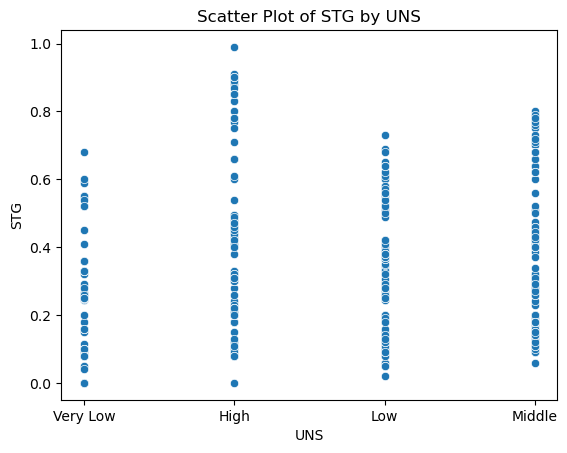

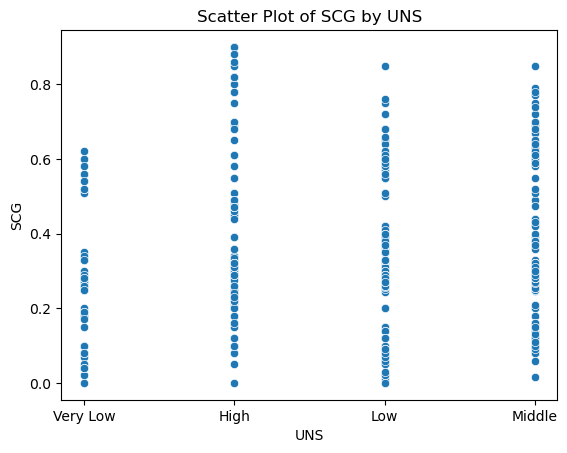

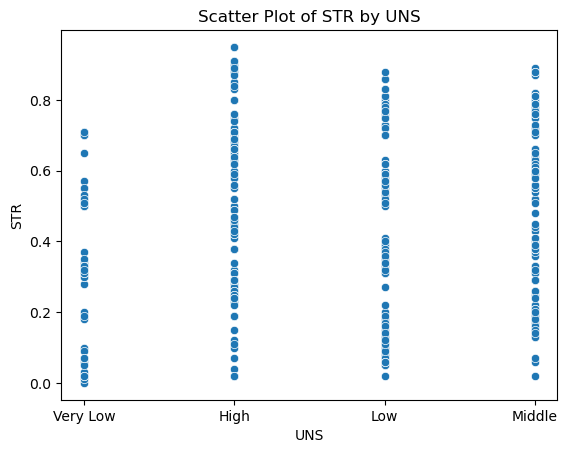

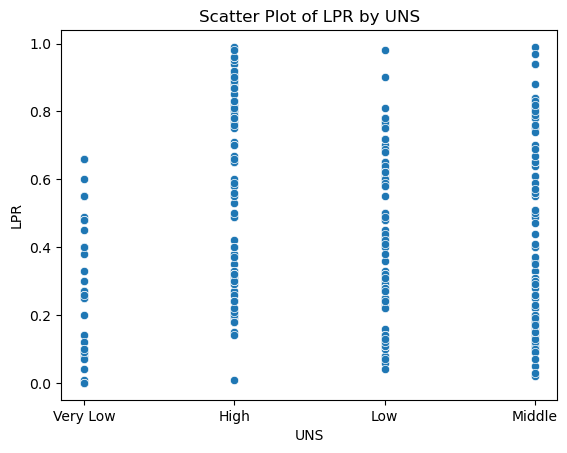

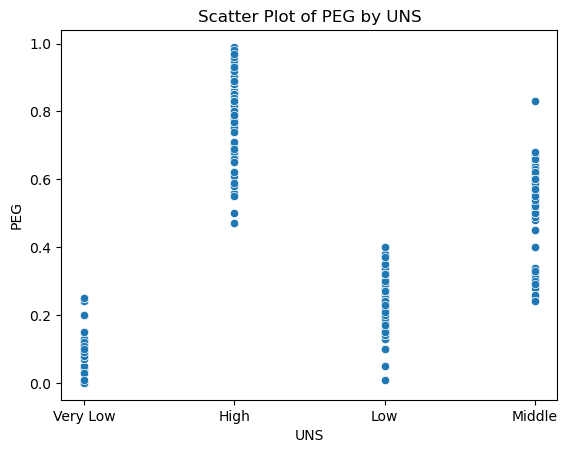

In [23]:
#IMPORTED NUMPY, SEABORN AND MATPLOTLIB ABOVE

#SPECIFYING THE COLUMNS TO INCLUDE IN THE SCATTERPLOT
columns_to_plot = ['STG', 'SCG', 'STR', 'LPR', 'PEG']

#CREATING A SCATTERPLOT FOR EACH COLOUMN WITH RESPECT TO UNS AS X-AXIS USING FOR-LOOP
for col in columns_to_plot:
    sns.scatterplot(x='UNS', y=col, data=dataset_df)
    plt.xlabel('UNS')  #SETTING THE LABEL FOR X-AXIS EVERYTIME
    plt.ylabel(col)  #SETTING THE LABEL FOR Y-AXIS EVERYTIME
    plt.title(f'Scatter Plot of {col} by UNS')  #SETTING THE TITLE FOR EACH SCATTERPLOT
    plt.show()


# TASK 3: DATA MODELLING

In [24]:
#IMPORTING LABELENCODER FROM sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

#CREATING INSTANCE OF LABLELENCODER
encoder = LabelEncoder()

#ENCODE THE UNS COLUMN
dataset_df['UNS'] = encoder.fit_transform(dataset_df['UNS'])

#PRINTING THE ENCODED VALUES
print(dataset_df['UNS'])


0      3
1      0
2      1
3      2
4      1
      ..
398    0
399    0
400    1
401    2
402    2
Name: UNS, Length: 403, dtype: int32


In [25]:
#PRINTING SHAPE OF DATA
dataset_df.shape

(403, 6)

In [26]:
#PREPARING DATA THAT WILL BE USED BELOW AS WELL

X = dataset_df.iloc[:, :-1].values  #FEATURE MATRIX
y = dataset_df.iloc[:, -1].values   #TARGET VECTOR


In [27]:
#PRINTING DATASET X ATTRIBUTES
print(X)

[[0.   0.   0.   0.   0.  ]
 [0.08 0.08 0.1  0.24 0.9 ]
 [0.06 0.06 0.05 0.25 0.33]
 ...
 [0.56 0.6  0.77 0.13 0.32]
 [0.66 0.68 0.81 0.57 0.57]
 [0.68 0.64 0.79 0.97 0.24]]


In [28]:
#PRINTING SHAPE OF X DATASET
X.shape

(403, 5)

In [29]:
#PRINTING DATASET Y TARGET VARIABLE
print(y)

[3 0 1 2 1 2 2 3 1 0 0 1 2 0 2 0 3 1 1 2 1 2 2 1 1 0 3 1 0 0 2 1 1 0 0 1 1
 1 3 2 1 0 2 2 3 2 2 0 0 2 1 2 1 0 2 1 2 2 0 1 1 2 2 1 2 3 3 2 1 2 2 0 3 2
 0 3 1 1 3 1 1 2 2 1 1 3 0 1 1 2 2 2 3 1 0 1 1 0 2 1 1 0 2 1 1 2 2 2 2 0 1
 1 0 0 2 2 3 0 2 0 1 1 1 2 0 0 0 1 1 2 1 2 3 0 2 2 1 1 2 1 3 2 2 1 2 0 1 3
 1 0 0 1 3 1 2 2 2 0 2 2 1 2 0 0 3 0 2 0 1 0 1 2 0 1 2 1 1 0 2 0 1 0 0 1 1
 1 0 2 1 0 2 0 2 0 2 1 3 1 2 3 3 2 3 1 0 1 2 2 3 0 2 2 0 2 2 1 1 0 2 1 1 2
 2 2 1 0 2 1 0 0 2 1 1 0 2 1 1 0 2 2 1 0 2 1 2 0 2 1 0 2 2 2 1 0 2 0 2 0 3
 1 0 0 0 1 2 1 0 3 2 3 0 2 0 3 0 3 1 2 0 1 1 1 2 3 1 2 2 3 1 1 2 0 1 2 1 0
 2 2 3 1 0 3 0 3 2 2 0 3 2 3 0 3 0 3 1 0 0 0 1 2 0 1 2 1 2 1 0 3 0 3 0 2 1
 0 1 0 0 2 0 3 3 1 2 1 0 3 1 0 1 2 1 3 1 2 0 1 3 1 2 1 2 2 3 1 2 2 1 0 1 1
 3 2 2 1 0 1 2 0 0 3 1 2 3 0 1 0 3 0 1 1 0 1 2 1 1 1 1 1 0 0 1 2 2]


In [30]:
#PRINTING DATSHAPE OF Y
y.shape

(403,)

# KNN MODELLING

In [31]:
#IMPORTING NEW NECESSARY LIBRARIES FOR KNN MODELLING
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#SPLITTING THE DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#TRAINING THE MODEL
knn = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn.fit(X_train, y_train)

#MAKING PREDICTIONS
y_prediction = knn.predict(X_test)

#EVALUATING THE MODEL
report = classification_report(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

print("Classification Report:")
print(report)
print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.77      0.91      0.83        22
           2       0.85      0.88      0.87        26
           3       0.89      0.67      0.76        12

    accuracy                           0.85        81
   macro avg       0.86      0.83      0.84        81
weighted avg       0.86      0.85      0.85        81

Accuracy: 0.8518518518518519


In [32]:
#INSTANTIATE KNN CLASSIFIER WITH K=3
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', p=1)

#FITTING THE CLASSIER INTO THE TRAINING DATA
knn.fit(X_train, y_train)

#MAKING PREDICTIONS ON THE TESTING DATA
y_prediction = knn.predict(X_test)

#COMPUTING THE ACCURACY
accuracy = accuracy_score(y_test, y_prediction)
print('Accuracy:', accuracy)

#PRINTING THE CLASSIFICATION REPORT
print(classification_report(y_test,y_prediction))

Accuracy: 0.8765432098765432
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.75      0.95      0.84        22
           2       0.92      0.85      0.88        26
           3       1.00      0.67      0.80        12

    accuracy                           0.88        81
   macro avg       0.90      0.85      0.87        81
weighted avg       0.89      0.88      0.88        81



In [33]:
#REPEATING THE SAME PROCESS


#INSTANTIATE KNN CLASSIFIER WITH K=3
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto', n_jobs=None)

#FITTING THE CLASSIER INTO THE TRAINING DATA
knn.fit(X_train, y_train)

#MAKING PREDICTIONS ON THE TESTING DATA
y_prediction = knn.predict(X_test)

#COMPUTING THE ACCURACY
accuracy = accuracy_score(y_test, y_prediction)
print('Accuracy:', accuracy)

#PRINTING THE CLASSIFICATION REPORT
print(classification_report(y_test, y_prediction))



Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.77      0.91      0.83        22
           2       0.85      0.88      0.87        26
           3       0.89      0.67      0.76        12

    accuracy                           0.85        81
   macro avg       0.86      0.83      0.84        81
weighted avg       0.86      0.85      0.85        81



In [34]:
#REPEATING SAME PROCESS OF SPLITTING, INTANTIATING, PREDICITNG ETC

knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)

knn.fit(X_train, y_train)

y_prediction = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_prediction))


Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.78      0.95      0.86        22
           2       0.92      0.88      0.90        26
           3       1.00      0.67      0.80        12

    accuracy                           0.89        81
   macro avg       0.91      0.86      0.88        81
weighted avg       0.90      0.89      0.89        81



In [35]:
#REPEATING SAME PROCESS OF SPLITTING, INTANTIATING, PREDICITNG ETC

knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=None)

knn.fit(X_train, y_train)

y_prediction = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_prediction)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_prediction))


Accuracy: 0.8518518518518519
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.75      0.95      0.84        22
           2       0.88      0.85      0.86        26
           3       1.00      0.58      0.74        12

    accuracy                           0.85        81
   macro avg       0.88      0.82      0.84        81
weighted avg       0.87      0.85      0.85        81



# DECISION TREE CLASSIFICATION

In [36]:
#IMPORTING ALL NECESSARY LIBRARIES FOR DECISION TREE FOR CLEARIFICATION, SOME OF THESE HAVE ALREADY BEEN IMPORTED ABOVE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#SPLITTING THE DATA INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#TRAINING THE DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)
dtc.fit(X_train, y_train)

#MAKING PREDICTIONS
y_prediction = dtc.predict(X_test)

#EVALUATING THE MODEL
report = classification_report(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

#PRINITNG THE CLASSIFICATION REPORT
print("Classification Report:")
print(report)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.83      0.91      0.87        22
           2       0.89      0.92      0.91        26
           3       1.00      0.75      0.86        12

    accuracy                           0.90        81
   macro avg       0.92      0.88      0.90        81
weighted avg       0.91      0.90      0.90        81

Accuracy: 0.9012345679012346


In [37]:
#REPEATING THE PROCESS
#ALL LIBRARIES REQUIRED HAVE ALREADY BEEN IMPORTED


#TRAINING THE DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier( min_weight_fraction_leaf=0.0, max_features='sqrt', random_state=None)
dtc.fit(X_train, y_train)

#MAKING PREDICTIONS
y_prediction = dtc.predict(X_test)

#EVALUATING THE MODEL
report = classification_report(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

#PRINITNG THE CLASSIFICATION REPORT
print("Classification Report:")
print(report)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.83      0.91      0.87        22
           2       0.79      0.85      0.81        26
           3       1.00      0.75      0.86        12

    accuracy                           0.84        81
   macro avg       0.87      0.83      0.84        81
weighted avg       0.85      0.84      0.84        81

Accuracy: 0.8395061728395061


In [38]:
#REPEATING THE PROCESS OF TRAINING THE DECISION TREE CLASSIFIER, MAKING PREDICTIONS, EVALUATING ETC
#ALL LIBRARIES REQUIRED HAVE ALREADY BEEN IMPORTED

dtc = DecisionTreeClassifier(min_samples_split=3,min_impurity_decrease=0.0, ccp_alpha=0.0)
dtc.fit(X_train, y_train)

y_prediction = dtc.predict(X_test)

report = classification_report(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

print("Classification Report:")
print(report)
print("Accuracy:", accuracy)

#IIMPORTING NECESSARY LIBRARY FOR DOT.DECISION TREE
from sklearn.tree import export_graphviz

#EXPORT THE DECISION TREE AS A DOT FILE
export_graphviz(dtc, out_file='decision_tree3.dot', feature_names=None)

#NAMING THE FILE
print("Decision tree exported as 'decision_tree.dot'.")


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.83      0.91      0.87        22
           2       0.89      0.92      0.91        26
           3       1.00      0.75      0.86        12

    accuracy                           0.90        81
   macro avg       0.92      0.88      0.90        81
weighted avg       0.91      0.90      0.90        81

Accuracy: 0.9012345679012346
Decision tree exported as 'decision_tree.dot'.


In [39]:
#REPEATING THE PROCESS OF TRAINING THE DECISION TREE CLASSIFIER, MAKING PREDICTIONS, EVALUATING ETC
#ALL LIBRARIES REQUIRED HAVE ALREADY BEEN IMPORTED

dtc = DecisionTreeClassifier( class_weight='balanced', criterion='entropy', max_leaf_nodes=4)
dtc.fit(X_train, y_train)

y_prediction = dtc.predict(X_test)

report = classification_report(y_test, y_prediction)
accuracy = accuracy_score(y_test, y_prediction)

print("Classification Report:")
print(report)
print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.84      0.73      0.78        22
           2       0.85      0.88      0.87        26
           3       0.69      0.92      0.79        12

    accuracy                           0.84        81
   macro avg       0.83      0.85      0.83        81
weighted avg       0.85      0.84      0.84        81

Accuracy: 0.8395061728395061


In [40]:
#REPEATING THE PROCESS OF TRAINING THE DECISION TREE CLASSIFIER, MAKING PREDICTIONS, EVALUATING ETC
#ALL LIBRARIES REQUIRED HAVE ALREADY BEEN IMPORTED

dtc = DecisionTreeClassifier(min_impurity_decrease=0.0, splitter='random', min_weight_fraction_leaf=0.0)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report:")
print(report)
print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.84      0.95      0.89        22
           2       0.96      0.92      0.94        26
           3       0.91      0.83      0.87        12

    accuracy                           0.93        81
   macro avg       0.93      0.92      0.92        81
weighted avg       0.93      0.93      0.93        81

Accuracy: 0.9259259259259259


# CROSS VALIDATION

In [41]:
#IMPORTING NEW LIBRARY NEEDED FOR CROSS VALIDATION
from sklearn.model_selection import cross_val_score

#USING THE SAME PARAMETERS AS USED ABOVE IN BOTH THE MODELS
knn_models = [
    KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski'),
    KNeighborsClassifier(n_neighbors=3, weights='distance', p=1),
    KNeighborsClassifier(n_neighbors=3, algorithm='auto', n_jobs=None),
    KNeighborsClassifier(n_neighbors=5, weights='distance', p=1),
    KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=None)
]

dt_models = [
    DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None),
    DecisionTreeClassifier(min_weight_fraction_leaf=0.0, max_features='sqrt', random_state=None),
    DecisionTreeClassifier(min_samples_split=3, min_impurity_decrease=0.0, ccp_alpha=0.0),
    DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_leaf_nodes=4),
    DecisionTreeClassifier(min_impurity_decrease=0.0, splitter='random', min_weight_fraction_leaf=0.0)
]

#PERFORMING CROSS VALIDATION FOR KNN MODELS
knn_accuracies = []
for knn_model in knn_models:
    knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)  # Change cv=5 to your desired number of folds
    knn_avg_accuracy = knn_scores.mean()
    knn_accuracies.append(knn_avg_accuracy)
    
    print("KNN model cross-validation scores for each fold:")
    for i, score in enumerate(knn_scores):
        print("Fold", i+1, "accuracy:", score)
    print()

#PERFORMING CROSS VALIDATION FOR DECISION TREE MODELS
decisiontree_accuracies = []
for dt_model in dt_models:
    dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)  # Change cv=5 to your desired number of folds
    dt_avg_accuracy = dt_scores.mean()
    decisiontree_accuracies.append(dt_avg_accuracy)
    
    print("Decision Tree model cross-validation scores for each fold:")
    for i, score in enumerate(dt_scores):
        print("Fold", i+1, "accuracy:", score)
    print()

#COMPARING THE ACCURACY OF THE MODELS AND DDETERMINING WHICH IS BETTER
max_knn_accuracy = max(knn_accuracies)
max_dt_accuracy = max(decisiontree_accuracies)

if max_knn_accuracy > max_dt_accuracy:
    print("KNN model has the highest cross-validated accuracy:", max_knn_accuracy)
elif max_dt_accuracy > max_knn_accuracy:
    print("Decision Tree model has the highest cross-validated accuracy:", max_dt_accuracy)
else:
    print("Both KNN and Decision Tree models have the same highest cross-validated accuracy:", max_knn_accuracy)


KNN model cross-validation scores for each fold:
Fold 1 accuracy: 0.9076923076923077
Fold 2 accuracy: 0.8461538461538461
Fold 3 accuracy: 0.828125
Fold 4 accuracy: 0.875
Fold 5 accuracy: 0.953125

KNN model cross-validation scores for each fold:
Fold 1 accuracy: 0.9384615384615385
Fold 2 accuracy: 0.8307692307692308
Fold 3 accuracy: 0.875
Fold 4 accuracy: 0.890625
Fold 5 accuracy: 0.96875

KNN model cross-validation scores for each fold:
Fold 1 accuracy: 0.9076923076923077
Fold 2 accuracy: 0.8461538461538461
Fold 3 accuracy: 0.828125
Fold 4 accuracy: 0.875
Fold 5 accuracy: 0.953125

KNN model cross-validation scores for each fold:
Fold 1 accuracy: 0.9538461538461539
Fold 2 accuracy: 0.8461538461538461
Fold 3 accuracy: 0.8125
Fold 4 accuracy: 0.921875
Fold 5 accuracy: 0.984375

KNN model cross-validation scores for each fold:
Fold 1 accuracy: 0.9384615384615385
Fold 2 accuracy: 0.8461538461538461
Fold 3 accuracy: 0.796875
Fold 4 accuracy: 0.875
Fold 5 accuracy: 0.953125

Decision Tree m